In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [14]:
df = pd.read_csv("/content/Zoo.csv")

df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [15]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [16]:
df = df.drop("animal name", axis=1)

df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


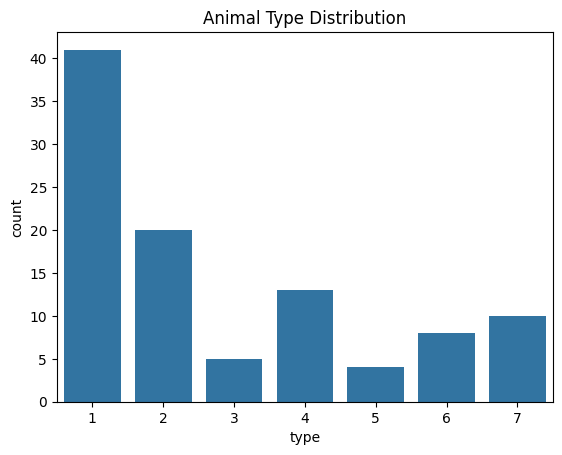

In [17]:
sns.countplot(x=df["type"])
plt.title("Animal Type Distribution")
plt.show()

In [18]:
X = df.drop("type", axis=1)
y = df["type"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (101, 16)
y shape: (101,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)

Train shape: (80, 16)


In [20]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("\nFirst 5 rows of scaled X_train:")
print(X_train[:5])

X_train shape: (80, 16)
X_test shape: (21, 16)

First 5 rows of scaled X_train:
    hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
89     0         0     1     0         0        1         0        1   
26     0         0     1     0         0        1         1        1   
42     0         0     1     0         1        0         1        0   
70     1         0     0     1         0        0         0        1   
15     0         0     1     0         0        1         1        0   

    backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
89         1         1         0     0     4     0         0        0  
26         1         1         1     0     4     0         0        0  
42         0         1         0     0     6     0         0        0  
70         1         1         0     0     4     1         1        1  
15         0         0         0     0     6     0         0        0  


In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9047619047619048

Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.75      0.82      0.77        21
weighted avg       0.90      0.90      0.90        21



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9047619047619048

Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.75      0.82      0.77        21
weighted avg       0.90      0.90      0.90        21



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9047619047619048

Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.75      0.82      0.77        21
weighted avg       0.90      0.90      0.90        21



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


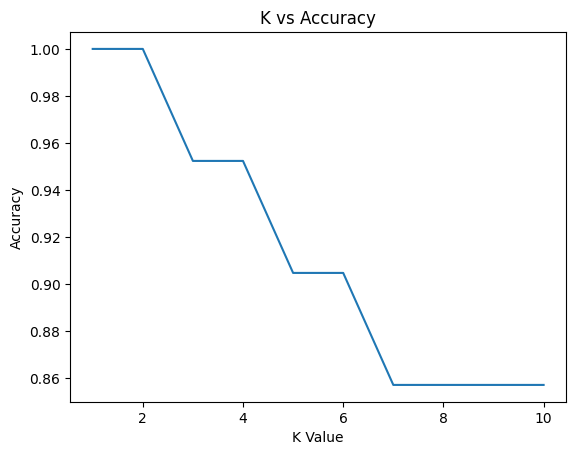

In [25]:
accuracies = []

for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, pred))

plt.plot(range(1, 11), accuracies)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()

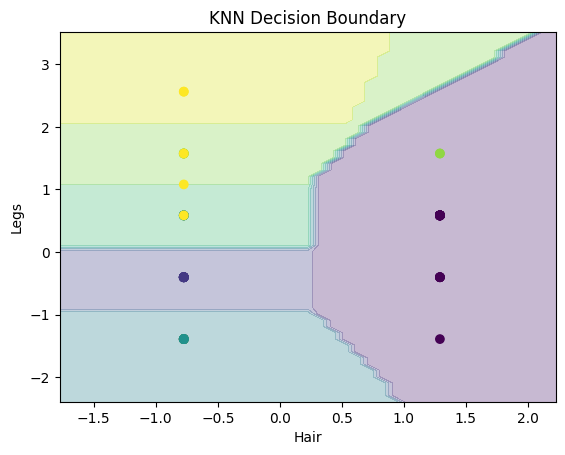

In [26]:
X_small = df[["hair", "legs"]]
y_small = df["type"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_small, y_small, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_s)
X_test_s = scaler.transform(X_test_s)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_s, y_train_s)

# Meshgrid
x_min, x_max = X_train_s[:, 0].min() - 1, X_train_s[:, 0].max() + 1
y_min, y_max = X_train_s[:, 1].min() - 1, X_train_s[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_s[:, 0], X_train_s[:, 1], c=y_train_s)
plt.xlabel("Hair")
plt.ylabel("Legs")
plt.title("KNN Decision Boundary")
plt.show()